In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.style.use('seaborn-notebook')
import mlflow
import pandas as pd

from mlflow.tracking import MlflowClient

MLFLOW_TRACKING_URI="http://192.168.1.154:5001/"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

import numpy as np

from ipywidgets import interact

In [6]:
from mlflow.entities import ViewType
names = []
experiments = mlflow.list_experiments(view_type=ViewType.ALL)
for exp in experiments:
    names.append(exp.name)

In [7]:
model = 'lstm'
EXPERIMENT_NAME = f"/archimedes-dl-{model}"

In [8]:
client = MlflowClient()
experiment_id = client.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

In [9]:
# Fetch experiment metadata information
experiment = client.get_experiment(experiment_id)
print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))

Name: /archimedes-dl-lstm
Experiment_id: 16
Artifact Location: gs://mlflow-arts/16
Tags: {}
Lifecycle_stage: active


In [6]:
runs = mlflow.search_runs(experiment_names=[EXPERIMENT_NAME])

In [10]:
status = 'RUNNING'
runs = mlflow.search_runs(
    experiment_ids=[ experiment_id ],
    #filter_string=f"attribute.status='{status}'",
    output_format="pandas",
    order_by=["metrics.start_time DESC"],
)

In [11]:
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.false_negatives,metrics.true_negatives,metrics.val_loss,metrics.false_positives,...,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.project.entryPoint,tags.mlflow.project.backend,tags.mlflow.source.git.commit,tags.mlflow.project.env,tags.features,tags.mlflow.log-model.history,tags.class,tags.model
0,eed441243309441193942b70b630d9e7,16,RUNNING,gs://mlflow-arts/16/eed441243309441193942b70b6...,2022-09-24 02:43:59.324000+00:00,NaT,49261.0,235760.0,0.708203,33546.0,...,PROJECT,spolex,main,local,b8f4ad7307341ba3d92dfc3c82caf085f6072390,docker,None,None,None,None
1,30b5694d566245bd9767b9aa61bf104f,16,FINISHED,gs://mlflow-arts/16/30b5694d566245bd9767b9aa61...,2022-09-23 23:14:39.033000+00:00,2022-09-24 02:43:59.240000+00:00,61616.0,226278.0,0.887448,43028.0,...,PROJECT,spolex,main,local,b8f4ad7307341ba3d92dfc3c82caf085f6072390,docker,radius_windowing_20220918,"[{""run_id"": ""30b5694d566245bd9767b9aa61bf104f""...",level,fcnn
2,23620ac687d247abb6ec3a5985fdea4e,16,FINISHED,gs://mlflow-arts/16/23620ac687d247abb6ec3a5985...,2022-09-23 22:45:42.626000+00:00,2022-09-23 23:14:38.998000+00:00,58888.0,223154.0,0.907563,46152.0,...,PROJECT,spolex,main,local,b8f4ad7307341ba3d92dfc3c82caf085f6072390,docker,radius_windowing_20220918,"[{""run_id"": ""23620ac687d247abb6ec3a5985fdea4e""...",level,fcnn
3,6ba758a1e60c4d0589c686a0b62b6dac,16,FINISHED,gs://mlflow-arts/16/6ba758a1e60c4d0589c686a0b6...,2022-09-23 22:12:32.398000+00:00,2022-09-23 22:45:42.589000+00:00,63458.0,227927.0,0.904707,41379.0,...,PROJECT,spolex,main,local,b8f4ad7307341ba3d92dfc3c82caf085f6072390,docker,radius_windowing_20220918,"[{""run_id"": ""6ba758a1e60c4d0589c686a0b62b6dac""...",level,fcnn
4,eeaea9b6d52f430c8dcbe5159ead6b72,16,FINISHED,gs://mlflow-arts/16/eeaea9b6d52f430c8dcbe5159e...,2022-09-23 21:51:53.209000+00:00,2022-09-23 22:12:32.365000+00:00,60936.0,225156.0,0.904740,44150.0,...,PROJECT,spolex,main,local,b8f4ad7307341ba3d92dfc3c82caf085f6072390,docker,radius_windowing_20220918,"[{""run_id"": ""eeaea9b6d52f430c8dcbe5159ead6b72""...",level,fcnn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,e19c5cb7df66452b9386ef32df8e94b8,16,FINISHED,gs://mlflow-arts/16/e19c5cb7df66452b9386ef32df...,2022-09-21 18:19:41.276000+00:00,2022-09-21 18:28:33.770000+00:00,7.0,19.0,0.652038,4.0,...,PROJECT,spolex,main,local,b8f4ad7307341ba3d92dfc3c82caf085f6072390,docker,None,"[{""run_id"": ""e19c5cb7df66452b9386ef32df8e94b8""...",None,None
172,549e916b205546c4bde2eeb749ae3cbc,16,FINISHED,gs://mlflow-arts/16/549e916b205546c4bde2eeb749...,2022-09-21 18:18:00.781000+00:00,2022-09-21 18:19:41.239000+00:00,12.0,23.0,0.733526,0.0,...,PROJECT,spolex,main,local,b8f4ad7307341ba3d92dfc3c82caf085f6072390,docker,None,"[{""run_id"": ""549e916b205546c4bde2eeb749ae3cbc""...",None,None
173,a416ba6e9680413d86ba26dbaefe31bd,16,FINISHED,gs://mlflow-arts/16/a416ba6e9680413d86ba26dbae...,2022-09-21 18:16:20.300000+00:00,2022-09-21 18:18:00.742000+00:00,12.0,23.0,0.714695,0.0,...,PROJECT,spolex,main,local,b8f4ad7307341ba3d92dfc3c82caf085f6072390,docker,None,"[{""run_id"": ""a416ba6e9680413d86ba26dbaefe31bd""...",None,None
174,906c0be6bd6542859e64a97e23e3f587,16,FINISHED,gs://mlflow-arts/16/906c0be6bd6542859e64a97e23...,2022-09-21 18:14:30.179000+00:00,2022-09-21 18:16:20.260000+00:00,12.0,23.0,0.724461,0.0,...,PROJECT,spolex,main,local,b8f4ad7307341ba3d92dfc3c82caf085f6072390,docker,None,"[{""run_id"": ""906c0be6bd6542859e64a97e23e3f587""...",None,None


In [14]:
last_run = runs.iloc[0]
last_run

run_id                                            eed441243309441193942b70b630d9e7
experiment_id                                                                   16
status                                                                     RUNNING
artifact_uri                     gs://mlflow-arts/16/eed441243309441193942b70b6...
start_time                                        2022-09-24 02:43:59.324000+00:00
                                                       ...                        
tags.mlflow.project.env                                                     docker
tags.features                                                                 None
tags.mlflow.log-model.history                                                 None
tags.class                                                                    None
tags.model                                                                    None
Name: 0, Length: 74, dtype: object

In [60]:
last_run.index

Index(['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time',
       'end_time', 'metrics.false_negatives', 'metrics.true_negatives',
       'metrics.val_loss', 'metrics.false_positives', 'metrics.recall',
       'metrics.val_false_positives', 'metrics.val_true_positives',
       'metrics.true_positives', 'metrics.loss', 'metrics.val_false_negatives',
       'metrics.accuracy', 'metrics.val_recall', 'metrics.precision',
       'metrics.val_true_negatives', 'metrics.val_accuracy',
       'metrics.val_precision', 'metrics.stopped_epoch', 'params.opt_momentum',
       'params.validation_steps', 'params.mini_batch_size', 'params.seed',
       'params.sample_weight', 'params.monitor', 'params.validation_freq',
       'params.shuffle', 'params.max_epoch', 'params.n_layers',
       'params.epochs', 'params.n_units', 'params.opt_learning_rate',
       'params.test_ratio', 'params.max_queue_size',
       'params.use_multiprocessing', 'params.validation_split',
       'params.min_del

In [69]:
last_run['status']

'RUNNING'

In [16]:
last_run['params.features_table'], last_run['params.labels_table']

('radius_windowing_20220918', 'levels_20220918')

In [78]:
input_tables = np.array(["radius_20220918", "radius_windowing_20220918", "radius_windowing__1_20220918", 
                "residues_windowing_20220918", "residues_windowing__1_20220918"])

fr = np.where(input_tables == last_run['params.features_table'])[0][0]
input_tables[fr:]

array(['radius_windowing_20220918', 'radius_windowing__1_20220918',
       'residues_windowing_20220918', 'residues_windowing__1_20220918'],
      dtype='<U30')

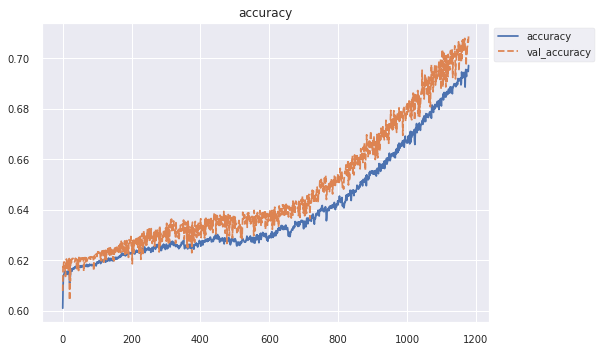

In [45]:
plt.title("accuracy")

plt.plot([i.value for i in client.get_metric_history(last_run['run_id'], 'accuracy')])
plt.plot([i.value for i in client.get_metric_history(last_run['run_id'], 'val_accuracy')], linestyle='--')
_=plt.legend(['accuracy','val_accuracy'],bbox_to_anchor=(1.25, 1.))

In [46]:
last_run['metrics.accuracy'], last_run['metrics.val_accuracy']

(0.6867800951004028, 0.6953395009040833)

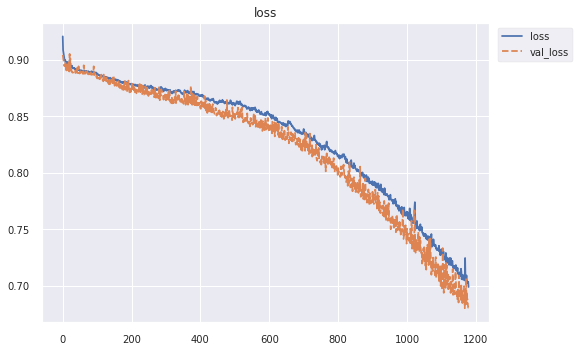

In [47]:
plt.title("loss")
plt.plot([i.value for i in client.get_metric_history(last_run['run_id'], 'loss')])
plt.plot([i.value for i in client.get_metric_history(last_run['run_id'], 'val_loss')], linestyle='--')
_=plt.legend(['loss','val_loss'],bbox_to_anchor=(1.2, 1.))

In [48]:
last_run['metrics.loss'], last_run['metrics.val_loss']

(0.721096396446228, 0.7082030773162842)

In [49]:
 last_run['metrics.val_false_positives']

16895.0

In [50]:
cm = np.array([['TP','FP'],['FN','TN']])
cm

array([['TP', 'FP'],
       ['FN', 'TN']], dtype='<U2')

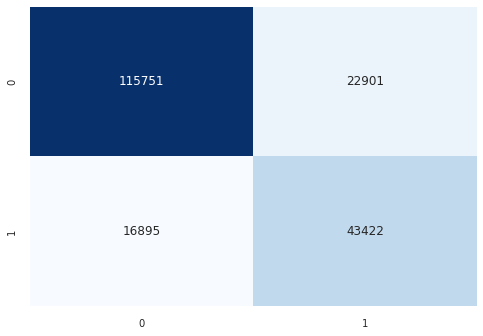

In [51]:
import numpy as np
import matplotlib.pyplot as plt

cm = np.array([[last_run['metrics.val_true_negatives'], last_run['metrics.val_false_negatives']],
[last_run['metrics.val_false_positives'] ,last_run['metrics.val_true_positives']]]).astype(np.int32)

_ = sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)

$$ Accuracy: \frac{TP + TN}{TP + TN + FP + FN} $$ 

$$    Recall: \frac{TP}{TP + FN} $$

$$    Precision: \frac{TP}{TP + FP} $$

$$    Specifity: \frac{TN}{TN + FP} $$

Where TP, TN, FP, and FN are, respectively, the true positive, true negative, false positive and false negative values
of the confusion matrix. The positive case corresponds to the ET subjects while the negative case to the CT ones.

**Equations explained**

* Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”. From the whole positive cases how many of them where properly detected.
* Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative”.
* Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in. 

The cheating is resolved by looking at both relevant metrics instead of just one. E.g. the cheating 100% sensitivity that always says “positive” has 0% specificity.

In [52]:
tn, fp, fn, tp = cm.flatten()
tn, fp, fn, tp

(115751, 22901, 16895, 43422)

In [53]:
accuracy = (tp+tn)/(tp+fp+fn+tn)
100 * accuracy

79.9988943001171

In [26]:
#Recall Sensitivity / Specifity
100 * (tp)/(tp+fn), 100 * (tn)/(tn+fp)

(71.98965465789081, 83.48310879035283)

In [27]:
# Precission positive / negative
100 * (tp)/(tp+fp), (tn)/(tn+fn)

(65.47050042971519, 0.8726309123531807)

In [28]:
# Save summary for documentation purposes 

In [31]:
usecols = ['params.features_table', 'params.labels_table'] + list(runs.columns[['accuracy' in column for column in runs.columns]])
df = runs[usecols]
df

,params.features_table,params.labels_table,metrics.accuracy,metrics.val_accuracy
0,radius_windowing_20220918,levels_20220918,0.686780,0.695340
1,radius_windowing_20220918,levels_20220918,0.605616,0.617086
2,radius_windowing_20220918,levels_20220918,0.605207,0.604345
3,radius_windowing_20220918,levels_20220918,0.604546,0.604270
4,radius_windowing_20220918,levels_20220918,0.603900,0.604270
...,...,...,...,...
171,radius_20220918,labels_20220918,0.685714,0.722222
172,radius_20220918,labels_20220918,0.657143,0.500000
173,radius_20220918,labels_20220918,0.657143,0.500000
174,radius_20220918,labels_20220918,0.657143,0.500000


In [55]:
df.groupby(["params.features_table", "params.labels_table"]).max().unstack(-1)

metrics.accuracy                  \
params.labels_table        labels_20220918 levels_20220918   
params.features_table                                        
radius_20220918                   0.771429             NaN   
radius_windowing_20220918              NaN        0.686780   
residues_rolling_20220918              NaN        0.742857   

                          metrics.val_accuracy                  
params.labels_table            labels_20220918 levels_20220918  
params.features_table                                           
radius_20220918                       0.722222             NaN  
radius_windowing_20220918                  NaN         0.69534  
residues_rolling_20220918                  NaN         0.50000